In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline
import mrio
import select_consumption as select
import combine as combine
import visualization as visual
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as shc
from string import ascii_letters
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold = np.inf)

In [14]:
#visualize the SDG network heatmap for global SDG goals with two mangrove loss data

#import matrix and names
path = r"C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/matlab/"
savepath = r'C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/final/'


# corr_file ='net_corr'
# file = 'net_rca'
# name_file = 'indicator_names'
# #import goals
name_file='goal_names'
corr_file ='Net_Goal_Correlation_2016'
file = 'Net_Goal_ProductSpace_2016'

##如果中文乱码，需要把csv在numbers里面另存为utf-8的格式，然后再读到这里面
sdg_rca=pd.read_csv(path+file+'.csv',header=None)
sdg_names = pd.read_csv(path+name_file+'.csv',encoding='utf-8-sig')
sdg_corr = pd.read_csv(path+corr_file+'.csv',header=None)

##organize the table
sdg_rca=sdg_rca.set_index(sdg_names['Goal_Indicators'])
sdg_rca=sdg_rca.set_axis(sdg_names['Goal_Indicators'],axis=1)

sdg_corr=sdg_corr.set_index(sdg_names['Goal_Indicators'])
sdg_corr=sdg_corr.set_axis(sdg_names['Goal_Indicators'],axis=1)

sdg=sdg_names

sdg_rca

Goal_Indicators,Gold_loss,GMW_loss,1 no poverty,2 zero hunger,3 good health & well-being,4 quality education,5 gender equality,6 clean water & sanitation,7 affordable & clean energy,8 decent work & economic growth,"9 industry, innovation & infrastructure",10 reduced inequalities,11 sustainable cities & communities,12 responsible consumption & production,13 climate action,14 life below water,15 life on land,16 justice & strong institutions,17 partnerships for the goals
Goal_Indicators,,,,,,,,,,,,,,,,,,,
Gold_loss,0.000000,0.942857,0.228571,0.542857,0.314286,0.333333,0.371429,0.314286,0.428571,0.657143,0.171429,0.571429,0.388889,0.771429,0.789474,0.657143,0.571429,0.371429,0.400000
GMW_loss,0.942857,0.000000,0.212121,0.545455,0.264706,0.277778,0.342857,0.303030,0.393939,0.657143,0.151515,0.575758,0.333333,0.818182,0.763158,0.676471,0.606061,0.363636,0.393939
1 no poverty,0.228571,0.212121,0.000000,0.484848,0.882353,0.833333,0.714286,0.696970,0.606061,0.485714,0.636364,0.484848,0.722222,0.121212,0.289474,0.352941,0.272727,0.545455,0.515152
2 zero hunger,0.542857,0.545455,0.484848,0.000000,0.470588,0.472222,0.514286,0.437500,0.468750,0.542857,0.343750,0.593750,0.416667,0.562500,0.578947,0.588235,0.437500,0.437500,0.437500
3 good health & well-being,0.314286,0.264706,0.882353,0.470588,0.000000,0.861111,0.685714,0.705882,0.617647,0.485714,0.588235,0.441176,0.750000,0.147059,0.342105,0.294118,0.235294,0.529412,0.558824
4 quality education,0.333333,0.277778,0.833333,0.472222,0.861111,0.000000,0.694444,0.694444,0.583333,0.527778,0.583333,0.416667,0.750000,0.166667,0.368421,0.333333,0.222222,0.500000,0.500000
5 gender equality,0.371429,0.342857,0.714286,0.514286,0.685714,0.694444,0.000000,0.685714,0.571429,0.457143,0.457143,0.400000,0.666667,0.314286,0.447368,0.428571,0.371429,0.457143,0.542857
6 clean water & sanitation,0.314286,0.303030,0.696970,0.437500,0.705882,0.694444,0.685714,0.000000,0.516129,0.428571,0.516129,0.375000,0.694444,0.290323,0.394737,0.294118,0.193548,0.451613,0.645161
7 affordable & clean energy,0.428571,0.393939,0.606061,0.468750,0.617647,0.583333,0.571429,0.516129,0.000000,0.342857,0.333333,0.375000,0.555556,0.433333,0.500000,0.382353,0.400000,0.400000,0.433333


In [15]:
#visualize the SDG network heatmap for global SDG goals with 20 mangrove indicators

#import matrix and names
path = r"C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/matlab/"
savepath = r'C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/final/'
# corr_file ='net_corr'
# file = 'net_rca'
# name_file = 'indicator_names'
# #import goals
name_file='MangroveGoalTable_07_16'
corr_file ='Net_MangroveCorr_07_16'
file = 'Net_Mangrove_Goal_Space_07_16'

##如果中文乱码，需要把csv在numbers里面另存为utf-8的格式，然后再读到这里面
sdg_rca=pd.read_csv(path+file+'.csv',header=None)
sdg_names = pd.read_csv(path+name_file+'.csv',encoding='utf-8-sig')
sdg_corr = pd.read_csv(path+corr_file+'.csv',header=None)

##organize the table
sdg_rca=sdg_rca.set_index(sdg_names['Id'])
sdg_rca=sdg_rca.set_axis(sdg_names['Id'],axis=1)

sdg_corr=sdg_corr.set_index(sdg_names['Id'])
sdg_corr=sdg_corr.set_axis(sdg_names['Id'],axis=1)

sdg=sdg_names

sdg_rca

Id,area_2016_km2,Net_Change_2007_2016,Gross_Loss_2007_2016,Gross_Gain_2007_2016,Country_Area_1996_km2,VDEM_2016,MPA_staff_capacity,BDH2020,ECI_2016,NDC_norm,Ind_prop,Ramsar_ha,Ramsar_sites,lights_growth_07_13,lights_growth_07_13_sum,travel_mean,Historic_SLR_Raw,Sediment_Mean,n_eye_buf_2007_2016,mean_SPEI_2007_2016,Goal1Score,Goal2Score,Goal3Score,Goal4Score,Goal5Score,Goal6Score,Goal7Score,Goal8Score,Goal9Score,Goal10Score,Goal11Score,Goal12Score,Goal13Score,Goal14Score,Goal15Score,Goal16Score,Goal17Score
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
area_2016_km2,0.000000,0.169811,0.122449,0.760000,1.000000,0.375000,0.325000,0.357143,0.342857,0.266667,0.400000,0.520000,0.360000,0.200000,0.400000,0.280000,0.432432,0.268293,0.244898,0.352941,0.285714,0.333333,0.275000,0.268293,0.342105,0.358974,0.282051,0.342105,0.240000,0.243243,0.315789,0.341463,0.297872,0.315789,0.277778,0.205882,0.333333
Net_Change_2007_2016,0.169811,0.000000,0.905660,0.132075,0.169811,0.415094,0.547170,0.547170,0.452830,0.679245,0.358491,0.301887,0.283019,0.377358,0.094340,0.245283,0.509434,0.603774,0.792453,0.433962,0.566038,0.528302,0.509434,0.547170,0.490566,0.452830,0.509434,0.547170,0.320755,0.584906,0.452830,0.547170,0.660377,0.528302,0.547170,0.471698,0.452830
Gross_Loss_2007_2016,0.122449,0.905660,0.000000,0.040816,0.122449,0.408163,0.591837,0.551020,0.469388,0.693878,0.326531,0.285714,0.265306,0.367347,0.061224,0.224490,0.469388,0.632653,0.816327,0.408163,0.571429,0.591837,0.510204,0.551020,0.448980,0.469388,0.551020,0.591837,0.346939,0.632653,0.448980,0.571429,0.693878,0.530612,0.551020,0.530612,0.448980
Gross_Gain_2007_2016,0.760000,0.132075,0.040816,0.000000,0.760000,0.312500,0.225000,0.261905,0.285714,0.200000,0.300000,0.500000,0.380952,0.217391,0.476190,0.333333,0.378378,0.219512,0.163265,0.382353,0.285714,0.230769,0.300000,0.268293,0.368421,0.307692,0.205128,0.263158,0.260870,0.162162,0.315789,0.243902,0.212766,0.236842,0.166667,0.147059,0.277778
Country_Area_1996_km2,1.000000,0.169811,0.122449,0.760000,0.000000,0.375000,0.325000,0.357143,0.342857,0.266667,0.400000,0.520000,0.360000,0.200000,0.400000,0.280000,0.432432,0.268293,0.244898,0.352941,0.285714,0.333333,0.275000,0.268293,0.342105,0.358974,0.282051,0.342105,0.240000,0.243243,0.315789,0.341463,0.297872,0.315789,0.277778,0.205882,0.333333
VDEM_2016,0.375000,0.415094,0.408163,0.312500,0.375000,0.000000,0.400000,0.571429,0.514286,0.311111,0.437500,0.250000,0.343750,0.250000,0.187500,0.281250,0.324324,0.292683,0.428571,0.470588,0.476190,0.461538,0.500000,0.512195,0.473684,0.538462,0.461538,0.421053,0.312500,0.270270,0.552632,0.341463,0.404255,0.315789,0.305556,0.470588,0.527778
MPA_staff_capacity,0.325000,0.547170,0.591837,0.225000,0.325000,0.400000,0.000000,0.547619,0.500000,0.644444,0.500000,0.400000,0.300000,0.300000,0.125000,0.250000,0.500000,0.609756,0.571429,0.525000,0.404762,0.600000,0.375000,0.414634,0.375000,0.450000,0.450000,0.475000,0.200000,0.525000,0.325000,0.731707,0.638298,0.650000,0.575000,0.375000,0.475000
BDH2020,0.357143,0.547170,0.551020,0.261905,0.357143,0.571429,0.547619,0.000000,0.428571,0.533333,0.452381,0.285714,0.309524,0.261905,0.142857,0.285714,0.404762,0.523810,0.571429,0.380952,0.547619,0.571429,0.547619,0.500000,0.619048,0.547619,0.547619,0.476190,0.285714,0.404762,0.547619,0.547619,0.553191,0.547619,0.571429,0.476190,0.571429
ECI_2016,0.342857,0.452830,0.469388,0.285714,0.342857,0.514286,0.500000,0.428571,0.000000,0.444444,0.400000,0.257143,0.400000,0.342857,0.285714,0.200000,0.405405,0.365854,0.387755,0.342857,0.547619,0.538462,0.625000,0.609756,0.500000,0.615385,0.564103,0.447368,0.428571,0.486486,0.605263,0.390244,0.361702,0.342105,0.333333,0.514286,0.527778


In [3]:
#visualize the mangrove SDG network heatmap for SDG indicators

#import matrix and names
path = r"C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/matlab/"
savepath = r'C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/final/'

# ##import indicators
corr_file ='Net_Mangrove_Indicator_Space_07_16'
file = 'Net_Mangrove_Indicator_Space_07_16'
name_file = 'Table_full_07_16'


##如果中文乱码，需要把csv在numbers里面另存为utf-8的格式，然后再读到这里面
sdg_rca=pd.read_csv(path+file+'.csv',header=None)
sdg_names = pd.read_csv(path+name_file+'.csv',low_memory=False)
sdg_corr = pd.read_csv(path+corr_file+'.csv',header=None)

##organize the table
sdg_rca=sdg_rca.set_index(sdg_names['Goal_Indicator'])
sdg_rca=sdg_rca.set_axis(sdg_names['Goal_Indicator'],axis=1)

sdg_corr=sdg_corr.set_index(sdg_names['Goal_Indicator'])
sdg_corr=sdg_corr.set_axis(sdg_names['Goal_Indicator'],axis=1)

##create the sdg_names file for concate later with nodes information for indicators
sdg_names.set_index('Goal_Indicator',inplace=True)
#sdg=sdg_names[['names']]


sdg_rca

Goal_Indicator,area_2016_km2,Net_Change_2007_2016,Gross_Loss_2007_2016,Gross_Gain_2007_2016,Country_Area_1996_km2,VDEM_2016,MPA_staff_capacity,BDH2020,ECI_2016,NDC_norm,Ind_prop,Ramsar_ha,Ramsar_sites,lights_growth_07_13,lights_growth_07_13_sum,travel_mean,Historic_SLR_Raw,Sediment_Mean,n_eye_buf_2007_2016,mean_SPEI_2007_2016,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_trophic,sdg2_crlyld,sdg2_snmi,sdg2_pestexp,sdg3_matmort,sdg3_neonat,sdg3_u5mort,sdg3_tb,sdg3_hiv,sdg3_ncds,sdg3_pollmort,sdg3_traffic,sdg3_lifee,sdg3_fertility,sdg3_births,sdg3_vac,sdg3_uhc,sdg3_swb,sdg4_earlyedu,sdg4_primary,sdg4_second,sdg4_literacy,sdg5_familypl,sdg5_edat,sdg5_lfpr,sdg5_parl,sdg6_water,sdg6_sanita,sdg6_freshwat,sdg6_wastewat,sdg6_scarcew,sdg7_elecac,sdg7_cleanfuel,sdg7_co2twh,sdg7_ren,sdg8_adjgrowth,sdg8_slavery,sdg8_accounts,sdg8_unemp,sdg8_rights,sdg8_impacc,sdg9_intuse,sdg9_mobuse,sdg9_lpi,sdg9_uni,sdg9_articles,sdg9_rdex,sdg10_gini,sdg10_palma,sdg11_slums,sdg11_pm25,sdg11_pipedwat,sdg11_transport,sdg12_msw,sdg12_ewaste,sdg12_so2prod,sdg12_so2import,sdg12_nprod,sdg12_nimport,sdg12_explastic,sdg13_co2gcp,sdg13_co2import,sdg13_co2export,sdg14_cpma,sdg14_cleanwat,sdg14_fishstocks,sdg14_trawl,sdg14_discard,sdg14_biomar,sdg15_cpta,sdg15_cpfa,sdg15_redlist,sdg15_forchg,sdg15_biofrwter,sdg16_homicides,sdg16_detain,sdg16_safe,sdg16_prs,sdg16_u5reg,sdg16_cpi,sdg16_clabor,sdg16_weaponsexp,sdg16_rsf,sdg16_justice,sdg17_govex,sdg17_oda,sdg17_govrev,sdg17_cohaven,sdg17_statperf
Goal_Indicator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
area_2016_km2,0.000000,0.211538,0.145833,0.769231,0.961538,0.375000,0.384615,0.395349,0.333333,0.325581,0.400000,0.538462,0.307692,0.192308,0.384615,0.307692,0.473684,0.292683,0.270833,0.421053,0.326087,0.305556,0.309524,0.263158,0.357143,0.410256,0.444444,0.419355,0.463415,0.320000,0.294118,0.292683,0.304348,0.234043,0.297297,0.378378,0.292683,0.333333,0.309524,0.305556,0.295455,0.309524,0.289474,0.343750,0.355556,0.365385,0.307692,0.333333,0.361111,0.340909,0.437500,0.343750,0.333333,0.295455,0.423077,0.230769,0.428571,0.311111,0.305556,0.357143,0.384615,0.375000,0.375000,0.258065,0.439024,0.342857,0.404762,0.312500,0.269231,0.481481,0.307692,0.192308,0.346154,0.432432,0.375000,0.472222,0.377778,0.277778,0.317073,0.394737,0.378378,0.393939,0.400000,0.341463,0.384615,0.350000,0.382979,0.367347,0.340426,0.333333,0.351351,0.405405,0.291667,0.391304,0.382979,0.411765,0.419355,0.270270,0.304348,0.333333,0.377358,0.315789,0.393939,0.333333,0.340426,0.153846,0.305556,0.358974,0.317073,0.352941,0.387097,0.371429,0.285714,0.325581,0.457143
Net_Change_2007_2016,0.211538,0.000000,0.884615,0.153846,0.192308,0.384615,0.557692,0.519231,0.442308,0.653846,0.384615,0.326923,0.288462,0.384615,0.115385,0.269231,0.538462,0.596154,0.769231,0.519231,0.576923,0.461538,0.576923,0.519231,0.576923,0.596154,0.538462,0.346154,0.557692,0.769231,0.653846,0.500000,0.557692,0.634615,0.519231,0.403846,0.519231,0.384615,0.500000,0.500000,0.596154,0.576923,0.480769,0.403846,0.576923,0.730769,0.538462,0.615385,0.384615,0.519231,0.480769,0.384615,0.615385,0.538462,0.653846,0.173077,0.576923,0.557692,0.500000,0.519231,0.500000,0.576923,0.653846,0.423077,0.596154,0.461538,0.576923,0.403846,0.211538,0.346154,0.211538,0.269231,0.326923,0.538462,0.442308,0.403846,0.596154,0.480769,0.538462,0.557692,0.538462,0.519231,0.576923,0.634615,0.557692,0.634615,0.653846,0.673077,0.692308,0.519231,0.461538,0.538462,0.711538,0.673077,0.634615,0.423077,0.442308,0.596154,0.673077,0.634615,0.773585,0.500000,0.442308,0.538462,0.596154,0.346154,0.442308,0.596154,0.596154,0.461538,0.346154,0.557692,0.519231,0.634615,0.384615
Gross_Loss_2007_2016,0.145833,0.884615,0.000000,0.041667,0.125000,0.395833,0.541667,0.541667,0.437500,0.645833,0.333333,0.312500,0.291667,0.375000,0.062500,0.229167,0.479167,0.645833,0.812500,0.458333,0.583333,0.458333,0.583333,0.541667,0.562500,0.6041

In [15]:
#input values and create nodes and edges files for Gephi
gephipath = r'C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/gephi/'
input_data=sdg_rca
input_value=0.45
data=input_data
data=pd.DataFrame(input_data.unstack()) #turn network data from wide to long
data.index.names=['source','target']
data=pd.DataFrame(data.reset_index())
data.columns= ['Source', 'Target', 'Weight']
data = data.sort_values(by='Weight', ascending=False)
data=data[data['Weight']<=1]
data=data[data['Weight']>=input_value]
data
#data.to_csv(gephipath+'0716_goal/edges.csv',index=False)
#data.to_csv(gephipath+'0716_indicators/edges.csv',index=False)
data.to_csv(gephipath+'2016goal/edges.csv',index=False)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_27208\4217976895.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(input_data,dtype=np.bool))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_27208\4217976895.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_linkage = shc.linkage(input_data, method='complete')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_27208\4217976895.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_linkage = shc.linkage(input

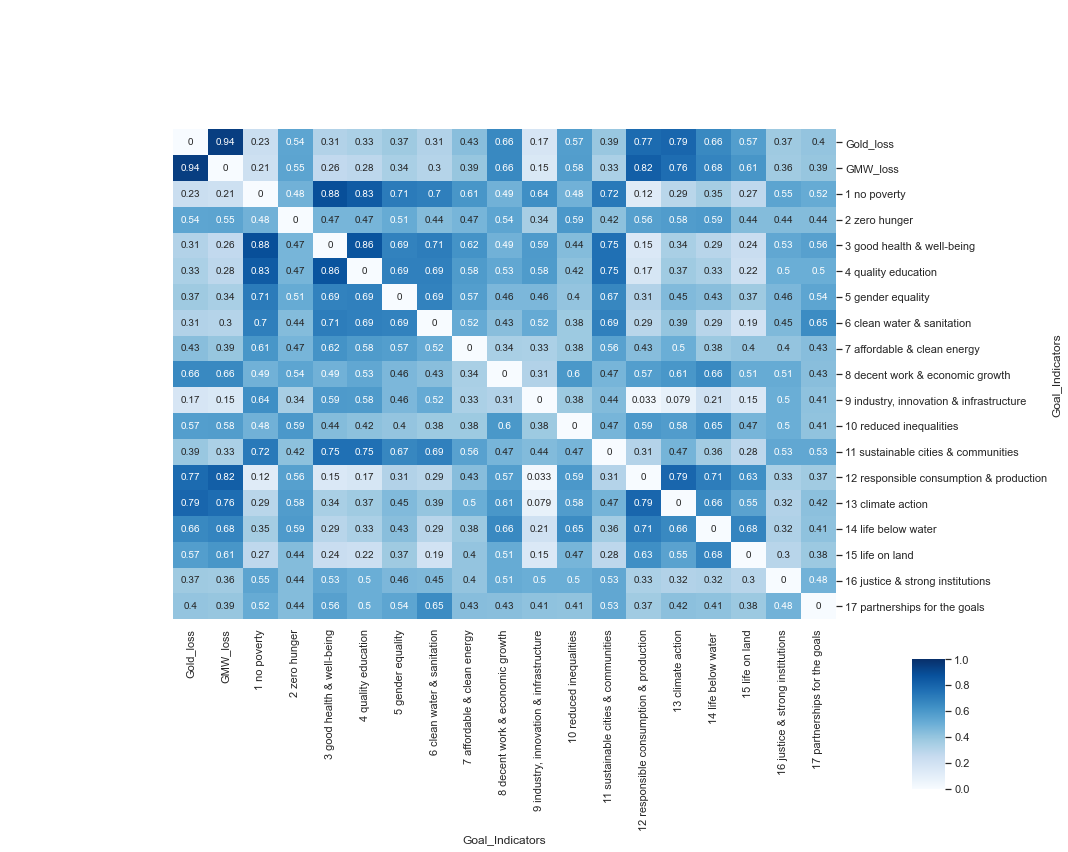

In [16]:
##heatmap

#plt.figure(figsize=(15,15))
mask=np.triu(np.ones_like(input_data,dtype=np.bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.color_palette("Blues", as_cmap=True)
# heatmap=sns.heatmap(data,mask=mask,cmap=cmap,annot=True,
#                   annot_kws={"size": 7})
# heatmap.set_title('Correlation Heatmap from RCA for 118 SDG indicators',fontdict={'fontsize':18},pad=12)
# fig=heatmap.get_figure() 
row_linkage = shc.linkage(input_data, method='complete')
col_linkage = shc.linkage(input_data.T, method='complete')


cg = sns.clustermap(input_data, row_linkage=row_linkage, col_linkage=col_linkage,method="complete",
                    cmap=cmap, annot=True, annot_kws={"size": 10},
                    vmin=0, vmax=1, figsize=(15,12),
                    row_colors=None, col_colors=None,
                   row_cluster=False, col_cluster=False,

                    linewidths=0, linecolor='white')
cg.cax.set_position((.85,0.08,.03,.15))
# cg.savefig(savepath+'RCA.svg',dpi=300,bbox_inches='tight')


C:/Users/lenovo/OneDrive/Mimi/SDGs/globalSDG/mangrove/final/
0.45062766598459464


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


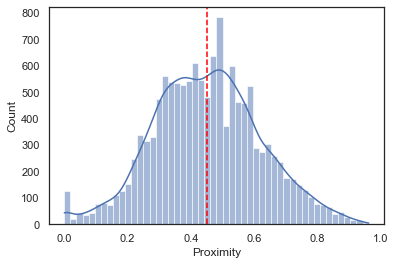

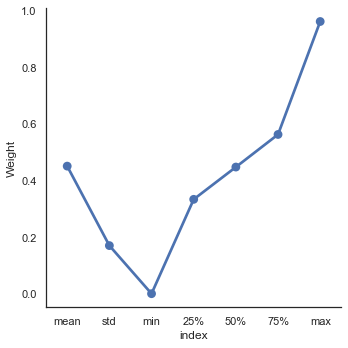

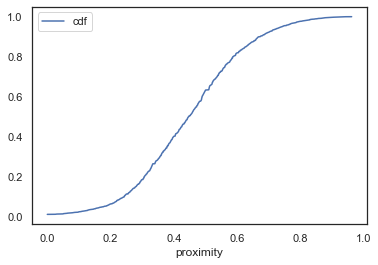

In [7]:
#prepare the dataset for network analysis



#create three graphs: all data, synergies only, and tradeoffs only
#create three graphs: all data, synergies only, and tradeoffs only
sns.set_style("white")


# calculate the mean of the variable
mean = data["Weight"].mean()


# generate the histogram plot with a density plot on top
g=sns.histplot(data=data, x="Weight",  alpha=0.5, kde=True)

# add a vertical line to highlight the mean
plt.axvline(mean, color='red', linestyle='--', label="Mean")

# add a legend to indicate the density line, histogram, and mean value in x axis

g.set_xlabel("Proximity")

# save the plot as a PNG image
print(savepath)
print(mean)
#g.figure.savefig(savepath+'distribution_mangroveGoal0716.svg',dpi=300,bbox_inches='tight')

num_col = data._get_numeric_data().columns
describe_num_df = data.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.factorplot(x='index', y=i, data=describe_num_df)
  plt.show()
    
stats_df = data\
.groupby('Weight') \
['Weight'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'Weight': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
sns.set_style("white")
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df
cg=stats_df.plot(x = 'Weight', y = [ 'cdf'], grid = True)
cg.set_xlabel("proximity")
cg.figure.set_facecolor("white")
cg.grid(False)

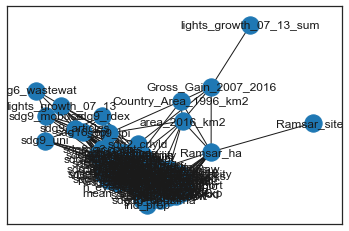

In [14]:
#netowrk simple visualization
import networkx as nx
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8,Viridis256
from bokeh.transform import linear_cmap
from networkx.algorithms import community
from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

#plt.figure(figsize=(8,8))

g =nx.from_pandas_edgelist(data,source='Source',target='Target',edge_attr='Weight')
#nx.draw_kamada_kawai(g,with_labels=True,node_color='skyblue',width=0.3,font_size=8)
nx.draw_networkx(g)


In [16]:

#visualization modifications of the goals
'''
for different network, we need to modify colors and sizes. 

'''
number_to_adjust_by =2
pallete =['mediumorchid',"yellowgreen",'forestgreen','firebrick']
#https://matplotlib.org/2.0.2/examples/color/named_colors.html



degrees = dict(nx.degree(g))
#print(degrees)
nx.set_node_attributes(g, name='degree', values=degrees)

weighted_degrees = dict(nx.degree(g, weight='weight'))
#print(weighted_degrees)
nx.set_node_attributes(g, name='weighted_degree', values=weighted_degrees)

#calculate the betweenness values.
betweenness_centrality = nx.betweenness_centrality(g)
nx.set_node_attributes(g, name='betweenness', values=betweenness_centrality)
#if degree are too small to notice, we need to slightly adjust the nodes
adjusted_node_size = dict([(node, int(weighted_degree*2.5+number_to_adjust_by)) for node, weighted_degree in nx.degree(g)])


nx.set_node_attributes(g, name='adjusted_node_size', values=adjusted_node_size)



#calculate communities

communities = nx.community.greedy_modularity_communities(g)
print(len(communities)) 
#print(communities)


modularity_class = {}
modularity_color = {}
goal={}


for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    
    #print(community_number)
        
    for name in community: 
        goal[name]=name.split('_')[0]  
        if len(community)>1:
            
            modularity_class[name] = community_number
            modularity_color[name] = pallete[community_number]
                  
        else:
            modularity_class[name]=99
            modularity_color[name]= 'lightgrey'

            
'''
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. 
The connected components of the remaining network are the communities. 
Instead of trying to construct a measure that tells us which edges are the most central to communities,
the Girvan–Newman algorithm focuses on edges that are most likely “between” communities.
Applying it to the small karate club:
# '''
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(g):
    centrality = betweenness(g, weight="weight")
    return max(centrality, key=centrality.get)

#communities = sorted(community.greedy_modularity_communities(G_karate), key=len, reverse=True)
result=nx.community.girvan_newman(g, most_valuable_edge=most_central_edge)
print(tuple(sorted(c) for c in next(result)))

# girvan=next(result)
# print(girvan)

# girvan_class = {}
# girvan_color = {}
# for group_num,group in enumerate(girvan):
#     for name in group:
#         print(name)
#         dex_name=list(g.nodes(data=True))[name][0][:2]  #china's province values
#         print(dex_name)
#         girvan_class[dex_name]=group_num
#         girvan_color[dex_name]=Viridis8[group_num]


        
#create weight colors
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "olive", "grey"

edge_attrs = {}

for start_node, end_node, wt in g.edges.data('weight'):
    edge_color = SAME_CLUB_COLOR if wt>=0.6 else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(g, edge_attrs, "edge_color")


#create weight width
edge_widths = {}

for start_node, end_node, wt in g.edges.data('weight'):
    if wt>=0.7:
        edge_width = "3" 
    else:
        edge_width = "0.5"
    edge_widths[(start_node, end_node)] = edge_width

nx.set_edge_attributes(g, edge_widths, "edge_width")
        
# Add modularity class and color as attributes from the network above
nx.set_node_attributes(g, modularity_class, 'modularity_class')
nx.set_node_attributes(g, modularity_color, 'modularity_color')
nx.set_node_attributes(g,goal,'goal')

#nx.set_node_attributes(g, girvan_class, 'girvan_class')
#nx.set_node_attributes(g, girvan_color, 'girvan_color') 

##visualization graph modifications

from bokeh.models import EdgesAndLinkedNodes, NodesAndLinkedEdges

# Set initial positions using nx.spring_layout()
pos = nx.spring_layout(g, seed=51)


#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'


#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Viridis8

#Choose a title!
title = ' Structure of Sustainable Development Goals Interactions_'+str(input_value)

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Goal","@goal"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
#     ("Girvan Class","@girvan_class"),
#     ("Girvan Color","@girvan_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-11.1, 11), y_range=Range1d(-11.1, 11), 
              title=title,toolbar_location='above',width=1200,height=1200, background_fill_color="white")


#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(g, pos, scale=10, center=(0, 0))



#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute,line_width=0.1)

#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5,line_color= 'edge_color',line_width="edge_width")

#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color='edge_color', line_width="edge_width")
network_graph.edge_renderer.hover_glyph = MultiLine(line_color= 'edge_color', line_width="edge_width")

    #Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)
#plot.circle(x='x',y='y',legend_group='Modularity Class',source=source)
# #Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
#if g.nodes.data("girvan_class"is int):
node_labels = list(g.nodes.data("goal")) 

source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i][1] for i in range(len(x))]})

labels = LabelSet(x='x', y='y', text='name', source=source,text_align='center',
                  text_baseline='middle', text_font_style='bold',  text_font_size='10pt',background_fill_alpha=1.7)
plot.add_layout(labels)


#plot.renderers.append(labels)
plot.xgrid.grid_line_color = "white"
plot.ygrid.grid_line_color = "white"
show(plot)
#save(plot, filename=f"{title}.html")

2
(['10 reduced inequalities', '12 responsible consumption & production', '13 climate action', '14 life below water ', '15 life on land', '2 zero hunger', '8 decent work & economic growth', 'GMW_loss', 'Gold_loss'], ['1 no poverty', '11 sustainable cities & communities', '16 justice & strong institutions', '17 partnerships for the goals', '3 good health & well-being', '4 quality education', '5 gender equality', '6 clean water & sanitation', '7 affordable & clean energy', '9 industry, innovation & infrastructure'])


In [15]:

#visualization modifications of the indicators
'''
for different network, we need to modify colors and sizes. 

'''
number_to_adjust_by =0
pallete =['mediumorchid',"yellowgreen",'forestgreen','firebrick']
#https://matplotlib.org/2.0.2/examples/color/named_colors.html



degrees = dict(nx.degree(g))
#print(degrees)
nx.set_node_attributes(g, name='degree', values=degrees)

weighted_degrees = dict(nx.degree(g, weight='weight'))
#print(weighted_degrees)
nx.set_node_attributes(g, name='weighted_degree', values=weighted_degrees)

#calculate the betweenness values.
betweenness_centrality = nx.betweenness_centrality(g)
nx.set_node_attributes(g, name='betweenness', values=betweenness_centrality)
#if degree are too small to notice, we need to slightly adjust the nodes
adjusted_node_size = dict([(node, int(degree-number_to_adjust_by)) for node, degree in nx.degree(g)])


nx.set_node_attributes(g, name='adjusted_node_size', values=adjusted_node_size)



#calculate communities

communities = nx.community.greedy_modularity_communities(g)
print(len(communities)) 
#print(communities)


modularity_class = {}
modularity_color = {}
goal={}


for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    
    #print(community_number)
        
    for name in community: 
        goal[name]=name.split('_')[0]  
        if len(community)>1:
            
            modularity_class[name] = community_number
            modularity_color[name] = pallete[community_number]
                  
        else:
            modularity_class[name]=99
            modularity_color[name]= 'lightgrey'

            
'''
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. 
The connected components of the remaining network are the communities. 
Instead of trying to construct a measure that tells us which edges are the most central to communities,
the Girvan–Newman algorithm focuses on edges that are most likely “between” communities.
Applying it to the small karate club:
# '''
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(g):
    centrality = betweenness(g, weight="weight")
    return max(centrality, key=centrality.get)

#communities = sorted(community.greedy_modularity_communities(G_karate), key=len, reverse=True)
result=nx.community.girvan_newman(g, most_valuable_edge=most_central_edge)
print(tuple(sorted(c) for c in next(result)))

# girvan=next(result)
# print(girvan)

# girvan_class = {}
# girvan_color = {}
# for group_num,group in enumerate(girvan):
#     for name in group:
#         print(name)
#         dex_name=list(g.nodes(data=True))[name][0][:2]  #china's province values
#         print(dex_name)
#         girvan_class[dex_name]=group_num
#         girvan_color[dex_name]=Viridis8[group_num]


        
#create weight colors
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "olive", "grey"

edge_attrs = {}

for start_node, end_node, wt in g.edges.data('weight'):
    edge_color = SAME_CLUB_COLOR if wt>=0.6 else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(g, edge_attrs, "edge_color")


#create weight width
edge_widths = {}

for start_node, end_node, wt in g.edges.data('weight'):
    if wt>=0.7:
        edge_width = "3" 
    elif wt >=0.6:
        edge_width = "0.5"
    else:
        edge_width = "0.5"
    edge_widths[(start_node, end_node)] = edge_width

nx.set_edge_attributes(g, edge_widths, "edge_width")
        
# Add modularity class and color as attributes from the network above
nx.set_node_attributes(g, modularity_class, 'modularity_class')
nx.set_node_attributes(g, modularity_color, 'modularity_color')
nx.set_node_attributes(g,goal,'goal')

#nx.set_node_attributes(g, girvan_class, 'girvan_class')
#nx.set_node_attributes(g, girvan_color, 'girvan_color') 

##visualization graph modifications

from bokeh.models import EdgesAndLinkedNodes, NodesAndLinkedEdges

# Set initial positions using nx.spring_layout()
pos = nx.spring_layout(g, seed=50)


#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'


#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Viridis8

#Choose a title!
title = ' Structure of Sustainable Development Indicators Interactions_'+str(input_value)

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Goal","@goal"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
#     ("Girvan Class","@girvan_class"),
#     ("Girvan Color","@girvan_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-11.1, 11), y_range=Range1d(-11.1, 11), 
              title=title,toolbar_location='above',width=1200,height=1200, background_fill_color="white")


#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(g, pos, scale=10, center=(0, 0))



#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute,line_width=0.1)

#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5,line_color= 'edge_color',line_width="edge_width")

#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color='edge_color', line_width='edge_width')
network_graph.edge_renderer.hover_glyph = MultiLine(line_color= 'edge_color', line_width='edge_width')

    #Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)
#plot.circle(x='x',y='y',legend_group='Modularity Class',source=source)
# #Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
#if g.nodes.data("girvan_class"is int):
node_labels = list(g.nodes.data("goal")) 

source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i][1] for i in range(len(x))]})

labels = LabelSet(x='x', y='y', text='name', source=source,text_align='center',
                  text_baseline='middle', text_font_style='bold',  text_font_size='10pt',background_fill_alpha=1.7)
plot.add_layout(labels)


#plot.renderers.append(labels)
plot.xgrid.grid_line_color = "white"
plot.ygrid.grid_line_color = "white"
show(plot)
#save(plot, filename=f"{title}.html")

3
(['BDH2020', 'Country_Area_1996_km2', 'ECI_2016', 'Gross_Loss_2007_2016', 'Historic_SLR_Raw', 'Ind_prop', 'MPA_staff_capacity', 'NDC_norm', 'Net_Change_2007_2016', 'Ramsar_ha', 'Ramsar_sites', 'Sediment_Mean', 'VDEM_2016', 'lights_growth_07_13_sum', 'mean_SPEI_2007_2016', 'n_eye_buf_2007_2016', 'sdg10_gini', 'sdg10_palma', 'sdg11_pipedwat', 'sdg11_pm25', 'sdg11_slums', 'sdg11_transport', 'sdg12_ewaste', 'sdg12_explastic', 'sdg12_msw', 'sdg12_nimport', 'sdg12_nprod', 'sdg12_so2import', 'sdg12_so2prod', 'sdg13_co2export', 'sdg13_co2gcp', 'sdg13_co2import', 'sdg14_biomar', 'sdg14_cleanwat', 'sdg14_cpma', 'sdg14_discard', 'sdg14_fishstocks', 'sdg14_trawl', 'sdg15_biofrwter', 'sdg15_cpfa', 'sdg15_cpta', 'sdg15_forchg', 'sdg15_redlist', 'sdg16_clabor', 'sdg16_cpi', 'sdg16_detain', 'sdg16_homicides', 'sdg16_justice', 'sdg16_prs', 'sdg16_rsf', 'sdg16_safe', 'sdg16_u5reg', 'sdg16_weaponsexp', 'sdg17_cohaven', 'sdg17_govex', 'sdg17_govrev', 'sdg17_oda', 'sdg17_statperf', 'sdg1_320pov', 'sdg1_w

In [17]:
#organize all attributes
nodes_df = pd.DataFrame(dict(g.nodes(data=True))).T
nodes_df=nodes_df.sort_values(by=['modularity_class','weighted_degree','goal'])
nodes_df

,degree,weighted_degree,betweenness,adjusted_node_size,modularity_class,modularity_color,goal
"9 industry, innovation & infrastructure",5,2.643791,0.0,14,0,mediumorchid,"9 industry, innovation & infrastructure"
17 partnerships for the goals,10,5.458741,0.010706,27,0,mediumorchid,17 partnerships for the goals
7 affordable & clean energy,10,6.022819,0.020273,27,0,mediumorchid,7 affordable & clean energy
6 clean water & sanitation,10,6.23747,0.006935,27,0,mediumorchid,6 clean water & sanitation
1 no poverty,10,6.574733,0.014993,27,0,mediumorchid,1 no poverty
3 good health & well-being,10,6.729825,0.0106,27,0,mediumorchid,3 good health & well-being
5 gender equality,11,6.746784,0.029687,29,0,mediumorchid,5 gender equality
16 justice & strong institutions,12,6.860802,0.046105,32,0,mediumorchid,16 justice & strong institutions
11 sustainable cities & communities,12,7.334085,0.035433,32,0,mediumorchid,11 sustainable cities & communities
4 quality education,13,7.7,0.060289,34,0,mediumorchid,4 quality education


In [18]:

include_columns=['target','source']
test = nx.to_pandas_edgelist(g)
test=test.sort_values(by=['weight']) 
#print(test)

test=test.set_index('source')
#print(test)
merge=pd.merge( test,nodes_df, left_on='target', right_index=True)
merge=merge[["weight","target","weighted_degree","betweenness","modularity_class"]]
merge

,weight,target,weighted_degree,betweenness,modularity_class
source,,,,,
4 quality education,0.450000,17 partnerships for the goals,5.458741,0.010706,0
7 affordable & clean energy,0.470588,17 partnerships for the goals,5.458741,0.010706,0
1 no poverty,0.470588,17 partnerships for the goals,5.458741,0.010706,0
13 climate action,0.476190,17 partnerships for the goals,5.458741,0.010706,0
3 good health & well-being,0.555556,17 partnerships for the goals,5.458741,0.010706,0
5 gender equality,0.555556,17 partnerships for the goals,5.458741,0.010706,0
11 sustainable cities & communities,0.578947,17 partnerships for the goals,5.458741,0.010706,0
6 clean water & sanitation,0.687500,17 partnerships for the goals,5.458741,0.010706,0
16 justice & strong institutions,0.687500,17 partnerships for the goals,5.458741,0.010706,0


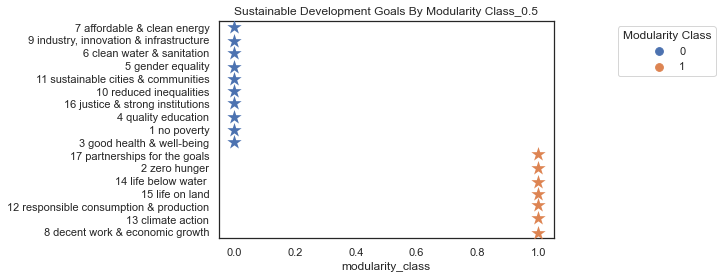

In [57]:
#plt.figure(figsize=(4,25))

fig =sns.stripplot(x='modularity_class', y=nodes_df.index, data=nodes_df,
              hue='modularity_class', marker='*',size=15)

fig.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
fig.set_title("Sustainable Development Goals By Modularity Class_"+str(input_value))
plt.show()


In [67]:
#organize all attribute and export tables
nodes_df = pd.DataFrame(dict(g.nodes(data=True))).T
df=pd.concat([nodes_df,sdg.reindex(nodes_df.index)],axis=1)
df=df.astype(str)
df
df.to_csv(savepath+'sdg_rca_poor_'+str(input_value)+'.csv',sep='\t',encoding='utf-8')


In [35]:
nodes_df.index=='4_6'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [25]:
#visualization modifications
'''
for different network, we need to modify colors and sizes. 
# I used 30 for trade-offs, 12 for synergies, and 15 for all in number to adjust
'''
number_to_adjust_by =15
#pallete =["yellowgreen",'mediumorchid','forestgreen','firebrick']
#https://matplotlib.org/2.0.2/examples/color/named_colors.html
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community



degrees = dict(nx.degree(g))
#print(degrees)
nx.set_node_attributes(g, name='degree', values=degrees)

weighted_degrees = dict(nx.degree(g, weight='weight'))
#print(weighted_degrees)
nx.set_node_attributes(g, name='weighted_degree', values=weighted_degrees)

#if degree are too small to notice, we need to slightly adjust the nodes



adjusted_node_size = dict([(node, int(weighted_degree+number_to_adjust_by)) for node, weighted_degree in nx.degree(g,weight='weight')])
#print(adjusted_node_size)
nx.set_node_attributes(g, name='adjusted_node_size', values=adjusted_node_size)

#calculate communities
communities = nx.community.greedy_modularity_communities(g)
print(len(communities)) #we have 93 communities for all sdg interactions
#print(communities)

# Create empty dictionaries
modularity_class = {}
modularity_color = {}
goal={}

#Loop through each community in the network, since we have 93 communities, 
#we categorize communities with only one indicator as one community
#it turns to have 4 communities.

for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    
    #print(community_number)
        
    for name in community: 
        goal[name]=name.split('_')[0]  
        if len(community)>1:
            
            modularity_class[name] = community_number
            modularity_color[name] = Viridis8[community_number]
                  
        else:
            modularity_class[name]=99
            modularity_color[name]= 'lightgrey'

            
'''
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. 
The connected components of the remaining network are the communities. 
Instead of trying to construct a measure that tells us which edges are the most central to communities,
the Girvan–Newman algorithm focuses on edges that are most likely “between” communities.
Applying it to the small karate club:
'''
G_karate = nx.karate_club_graph()
#communities = sorted(community.greedy_modularity_communities(G_karate), key=len, reverse=True)
result=nx.community.girvan_newman(G_karate)
girvan=next(result)

girvan_class = {}
girvan_color = {}
for group_num,group in enumerate(girvan):
    for name in group:
        
        dex_name=list(g.nodes(data=True))[name][0]

        girvan_class[dex_name]=group_num
        girvan_color[dex_name]=Viridis8[group_num+4]


#create weight colors
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "olive", "tomato"

edge_attrs = {}

for start_node, end_node, wt in g.edges.data('weight'):
    edge_color = SAME_CLUB_COLOR if wt>0 else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(g, edge_attrs, "edge_color")
      
        
# Add modularity class and color as attributes from the network above
nx.set_node_attributes(g, modularity_class, 'modularity_class')
nx.set_node_attributes(g, modularity_color, 'modularity_color')
nx.set_node_attributes(g,goal,'goal')

nx.set_node_attributes(g, girvan_class, 'girvan_class')
nx.set_node_attributes(g, girvan_color, 'girvan_color') 

2


IndexError: list index out of range

In [69]:
##visualization graph modifications



from bokeh.models import EdgesAndLinkedNodes, NodesAndLinkedEdges

#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'


#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Viridis8

#Choose a title!
title = ' Structure of Sustainable Development Goals Interactions'+input_value

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Goal","@goal"),
        ("Degree", "@weighted_degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
    ("Girvan Class","@girvan_class"),
    ("Girvan Color","@girvan_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-11.1, 11), y_range=Range1d(-11.1, 11), 
              title=title,toolbar_location='above',width=600,height=600)


#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(g, nx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute,line_width=0)
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5,line_color='edge_color',line_width=0.3)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color="edge_color", line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color="edge_color", line_width=1)

    #Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)
#plot.circle(x='x',y='y',legend_group='Modularity Class',source=source)
# #Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
# if g.nodes.data("girvan_class"is int):
#     node_labels = list(g.nodes.data("goal")) 
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i][1] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, text_font_size='12px', background_fill_alpha=1.7)
plot.renderers.append(labels)

show(plot)
#save(plot, filename=f"{title}.html")
      

TypeError: can only concatenate str (not "float") to str

In [92]:
if g.nodes.data("girvan_class"==True):
    node_labels = list(g.nodes.data("goal")) 
    print(len(node_labels))

118


In [59]:
#who has the most connections with weights
degree_df = pd.DataFrame(g.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df
weighted_degrees = dict(nx.degree(g, weight='weight'))
nx.set_node_attributes(g, name='weighted_degree', values=weighted_degrees)
weighted_degree_df = pd.DataFrame(g.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
4,3_7,7.257145
1,3_5,6.653752
0,4_5,6.269946
67,3_16,5.962467
15,2_1,5.924378
...,...,...
30,6_3,-5.429069
31,15_6,-5.429069
65,13_5,-5.901093
63,9_5,-5.901093


In [66]:
#calculate the betweenness centrality scores
betweenness_centrality = nx.betweenness_centrality(g)
nx.set_node_attributes(g, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(g.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
0,1_1,0.0
74,9_13,0.0
86,12_1,0.0
85,11_6,0.0
84,11_5,0.0
...,...,...
35,4_3,0.0
34,4_2,0.0
33,4_1,0.0
32,3_18,0.0


In [221]:
#detect the communities
from networkx.algorithms import community
communities = community.greedy_modularity_communities(g)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number
nx.set_node_attributes(g, modularity_class, 'modularity_class')
communities_df = pd.DataFrame(g.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df

,node,modularity_class
87,3_15,6
86,3_11,6
63,5_1,5
62,16_2,5
61,6_4,5
...,...,...
58,3_4,0
59,17_1,0
60,2_7,0
64,5_4,0


In [52]:
nodes_df = pd.DataFrame(dict(g.nodes(data=True))).T
nodes_df

,degree,weighted_degree,modularity_class,betweenness
1_1,14.0,7.734703,0.0,0.008610
1_2,14.0,7.853283,0.0,0.030350
3_12,8.0,4.101918,0.0,0.001778
4_3,15.0,8.404291,0.0,0.018477
4_9,16.0,8.843998,0.0,0.052084
...,...,...,...,...
7_2,3.0,1.729725,0.0,0.000328
17_1,5.0,2.942884,1.0,0.034268
9_2,1.0,0.487560,0.0,0.000000
11_5,8.0,3.966092,0.0,0.002192


In [54]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [24]:
#import pyvis
from pyvis.network import Network
net =Network(notebook=True)
net.from_nx(g)
net.show_buttons(filter_=['physics'])
net.show('example.html')

In [22]:
def plot_corr(df,size=16):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90,size=24);
    plt.yticks(range(len(corr.columns)), corr.columns,size=24);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[ 0, 1], aspect=40, shrink=.8)

In [24]:
import scipy
import scipy.cluster.hierarchy as sch

def _clustering_pass(sub, is_corr):
    df = sub.copy()
    
    if is_corr: 
        X = df.values
    else:
        X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')

    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df = df.reindex(columns, axis='columns')
    if is_corr: df = df.reindex(columns, axis='index')
    
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))

    return (ind, counts, df)

def cluster_layer(sub, cluster_th, max_level, is_corr=False, level=1):
    '''Perform Hierarchical clustering on either raw data or a correlation matrix.

    Input:
        sub: pandas DataFrame of the data or correlation matrix of the data
        cluster_th: threshold of the size of the minimum cluster to sub cluster.
        max_level: maximum number of recursion allowed i.e. maximum of time we will sub cluster bigger clusters
        is_corr: if a correlation matrix is used as input, set to True
    Output:
        df: pandas DataFrame for which the columns (and rows if the input is a correlation matrix) 
            have been ordered according to the hierarchical clustering'''
    df = sub.copy()
    ind, counts, df = _clustering_pass(df, is_corr)

    print('level: {} shape of the matrix clustered: {}'.format(level, df.shape))
    
    if level < max_level:
        i = 0
        j = 0
        columns = []
        for cluster_l1 in set(sorted(ind)):
            j += counts[cluster_l1]
            if is_corr:
                sub = df.iloc[i:j,i:j]
            else:
                sub = df[df.columns.values[i:j]]
            if counts[cluster_l1]>cluster_th:        
                sub = cluster_layer(sub, cluster_th, max_level, is_corr, level+1)

            cols = sub.columns.tolist()
            columns.extend(cols)
            i = j
        df = df.reindex(columns, axis='columns')
        if is_corr: df = df.reindex(columns, axis='index')
    
    return df

level: 1 shape of the matrix clustered: (17, 17)


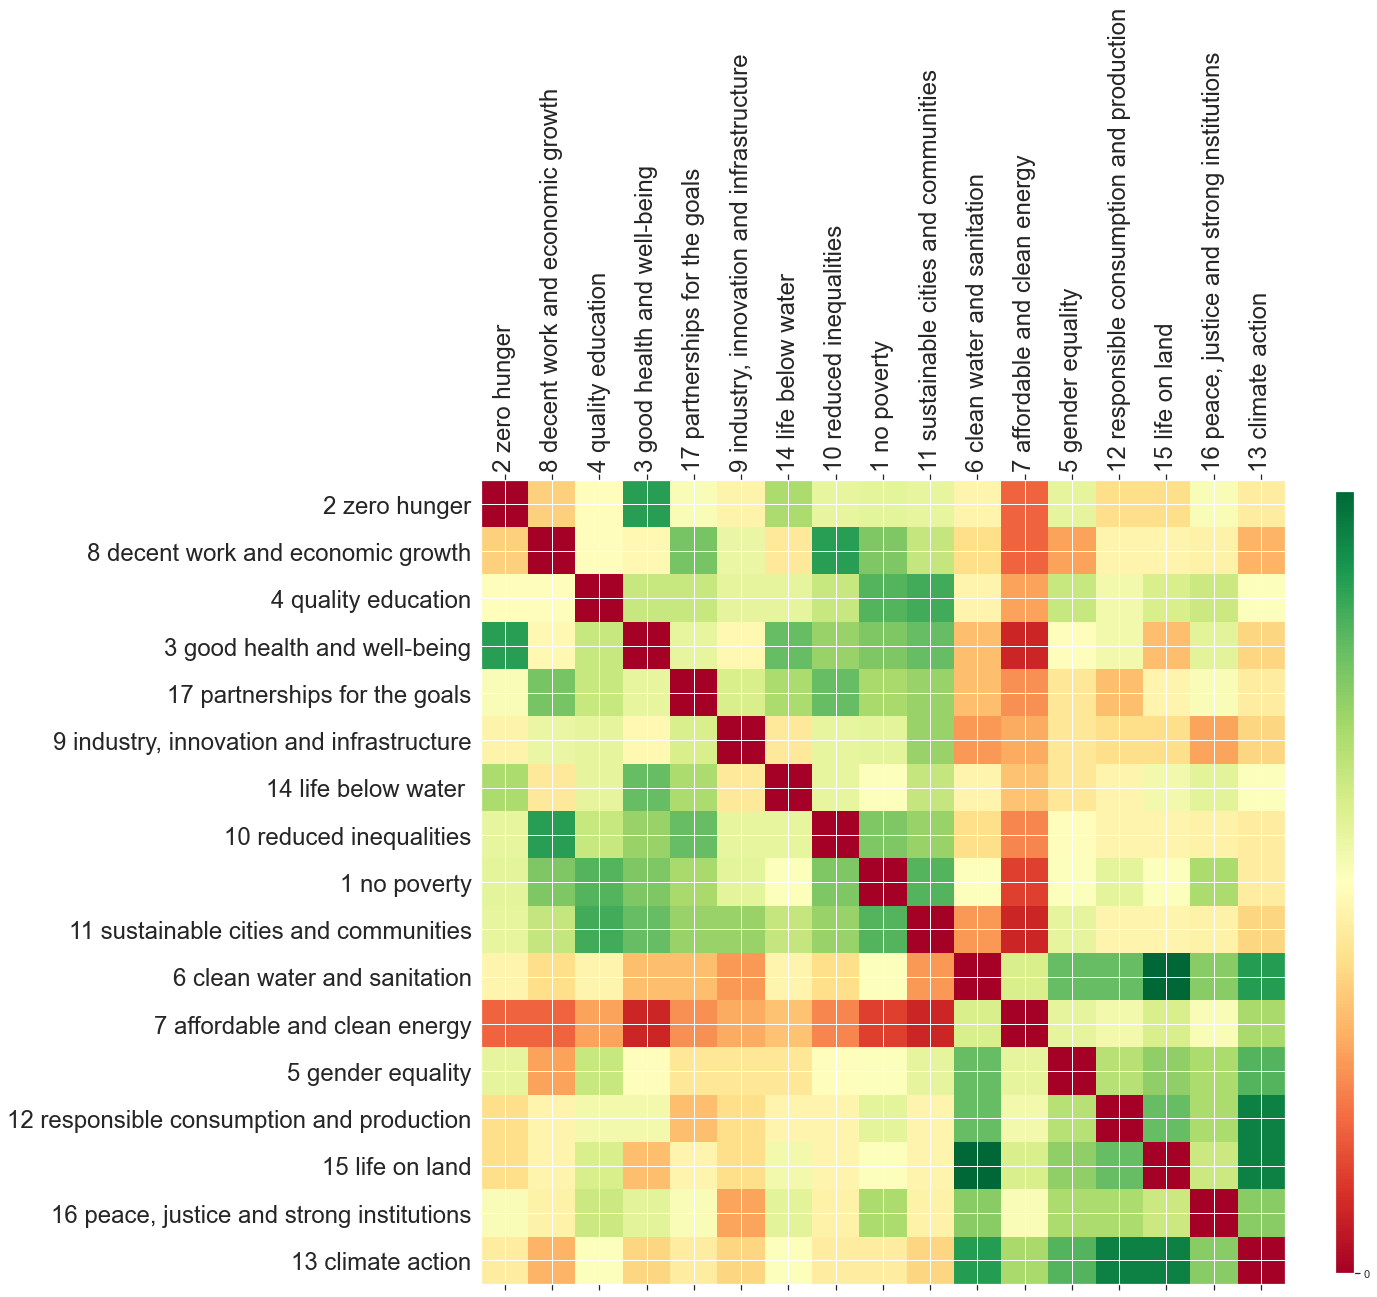

In [28]:
df_1pass = cluster_layer(sdg_rca, cluster_th=3, is_corr=True, max_level=1)
plot_corr(df_1pass, size=18)